In [16]:
import cu_rsc as cr
cr.setup_tables()
import RSC_sim
import numpy as np
import cupy as cp
import cupyx
import matplotlib.pyplot as plt

M_dev = cr.load_m_table_device()        # upload to GPU
res   = cr.resources_from_config(M_dev)

### Original

In [6]:
def score_sequence(mol):
    """Return (penalized_score, raw_survivors_in_region)."""
    
    n_x, n_y, n_z, is_lost = mol[:, 0], mol[:, 1], mol[:, 2], mol[:, 5]
    mask = (is_lost == 0) & (n_x < 2) & (n_y < 2) & (n_z < 140)
    raw = int(cp.count_nonzero(mask).get())
    return raw

In [2]:
original_gpu = cr.get_original_sequences_gpu()  # list/tuple of cp.ndarray blocks

# Repeat each block along the first axis, then concatenate in order
blocks = [
    cp.tile(original_gpu[0], (10, 1)),  # repeat 10 times
]

seq_gpu = cp.concatenate(blocks, axis=0)

In [5]:
np.save("XY_original.npy", cp.asarray(seq_gpu))

Raman pulses: 100%|██████████| 40/40 [00:07<00:00,  5.43it/s]


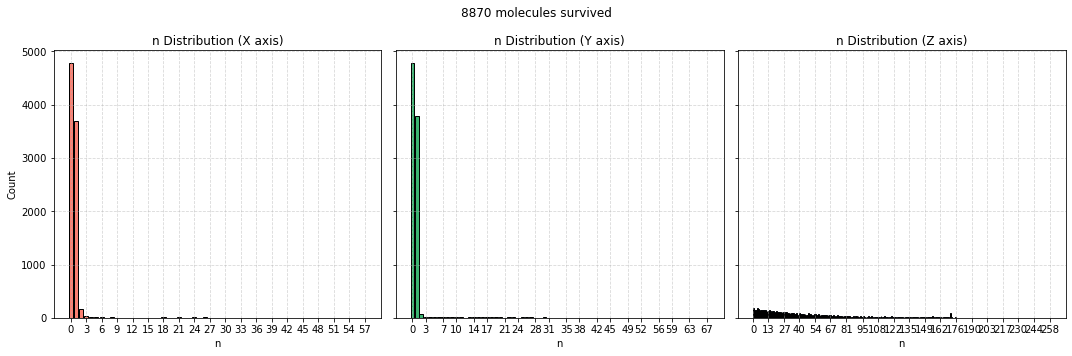

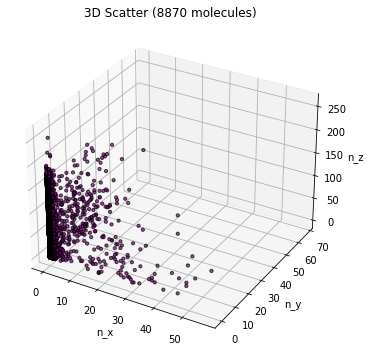

survival_rate_mean 0.887
mot_mean [ 0.83122886  0.89695603 49.76741826]
mot_sem [0.00106435 0.00109133 0.01577131]


In [ ]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules_gpu(10_000, temp)
cr.raman_cool_with_pumping(mol_0, seq_gpu, res, show_progress=True)
dist_gpu = cr.get_n_distribution_gpu(mol_0, max_bins=20)

result = cr.bootstrap_stats_from_molecules(mol_0)
print("survival_rate_mean", result['survival_rate_mean'])
print("mot_mean", result['mot_mean'])
print("mot_sem", result['mot_sem'])

In [7]:
score_sequence(mol_0)

7870

#### Optimized

In [20]:
seq_op = cp.array(np.load("ga_runs/XY_20251026_214555/final_top5/top1_sequence.npy"))

Raman pulses:   0%|          | 0/40 [00:00<?, ?it/s]

Raman pulses: 100%|██████████| 40/40 [00:06<00:00,  5.95it/s]


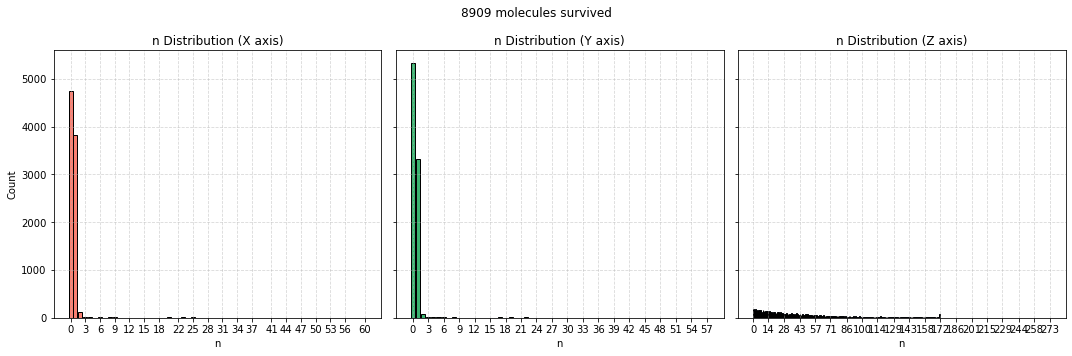

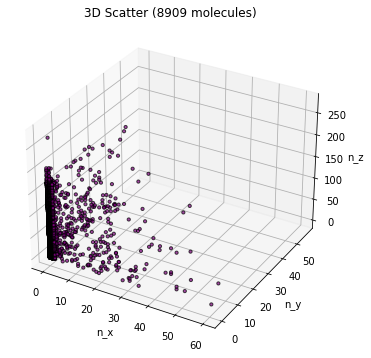

survival_rate_mean 0.8909
mot_mean [ 0.87024357  0.71276238 49.30732967]
mot_sem [0.00115785 0.00094419 0.01496201]


In [21]:
temp = [25e-6, 25e-6, 25e-6]
mol_1 = cr.build_thermal_molecules_gpu(10_000, temp)
cr.raman_cool_with_pumping(mol_1, seq_op, res, show_progress=True)
dist_gpu = cr.get_n_distribution_gpu(mol_1, max_bins=20)

result = cr.bootstrap_stats_from_molecules(mol_1)
print("survival_rate_mean", result['survival_rate_mean'])
print("mot_mean", result['mot_mean'])
print("mot_sem", result['mot_sem'])

In [22]:
score_sequence(mol_1)

8038